In [1]:
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616823 sha256=352c9f5cf4b278c4871e8481df8995c2479a45851f9d81a39fd459ac55ace923
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
def init_cnn(module):
  #Initalize weights for CNN
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

In [4]:
class LeNet(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )


In [5]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)
  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


In [6]:
@d2l.add_to_class(d2l.Classifier)
def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        Y_hat = self(*batch[:-1])
        self.plot('loss', l, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return l

In [7]:
@d2l.add_to_class(d2l.Classifier)
def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [8]:
pip install ptflops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11712 sha256=aea9122f9b9ebeea99d9d854608cd6011dee1bfdaf799e1615988c70cc31891a
  Stored in directory: /root/.cache/pip/wheels/b6/86/d5/cf62a3571b005f91cd9accefc5e10f40214538be997198afad
Successfully built ptflops


In [9]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

**Problem 1 Model**


In [16]:
data = d2l.FashionMNIST(batch_size=128)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



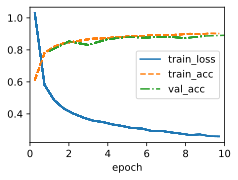

In [ ]:
trainer = d2l.Trainer(max_epochs=10)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

Problem 2 Model - Adjusted Convolution Window Size

In [ ]:
class LeNet1(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=3, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=3), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )

In [ ]:
model1 = LeNet1()
model1.layer_summary((1, 1, 28, 28))

Conv2d output shape: 	 torch.Size([1, 6, 30, 30])
ReLU output shape: 	 torch.Size([1, 6, 30, 30])
MaxPool2d output shape: 	 torch.Size([1, 6, 15, 15])
Conv2d output shape: 	 torch.Size([1, 16, 13, 13])
ReLU output shape: 	 torch.Size([1, 16, 13, 13])
MaxPool2d output shape: 	 torch.Size([1, 16, 6, 6])
Flatten output shape: 	 torch.Size([1, 576])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


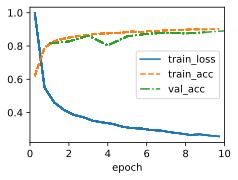

In [ ]:
trainer = d2l.Trainer(max_epochs=10)
model1 = LeNet1(lr=0.1)
model1.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model1, data)

In [ ]:
with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model1, (1, 28, 28), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

LeNet1(
  81.19 k, 100.000% Params, 299.39 KMac, 100.000% MACs, 
  (net): Sequential(
    81.19 k, 100.000% Params, 299.39 KMac, 100.000% MACs, 
    (0): Conv2d(60, 0.074% Params, 54.0 KMac, 18.037% MACs, 1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 5.4 KMac, 1.804% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 5.4 KMac, 1.804% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(880, 1.084% Params, 148.72 KMac, 49.675% MACs, 6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 2.7 KMac, 0.903% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 2.7 KMac, 0.903% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(69.24 k, 85.277% Params, 69.24 KMac, 23.127% MACs, in_features=576, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Mac, 0.040% MACs, )
    (9): Linear(

Problem 2 Model - Adjusted number of output channels

In [ ]:
class LeNet2(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(12, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(32, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )


In [ ]:
model2 = LeNet2()
model2.layer_summary((1, 1, 28, 28))

Conv2d output shape: 	 torch.Size([1, 12, 28, 28])
ReLU output shape: 	 torch.Size([1, 12, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 12, 14, 14])
Conv2d output shape: 	 torch.Size([1, 32, 10, 10])
ReLU output shape: 	 torch.Size([1, 32, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 32, 5, 5])
Flatten output shape: 	 torch.Size([1, 800])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


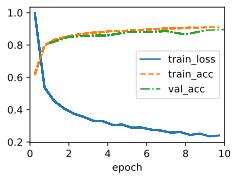

In [ ]:
trainer = d2l.Trainer(max_epochs=10)
model2 = LeNet2(lr=0.1)
model2.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model2, data)

In [ ]:
with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model2, (1, 28, 28), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

LeNet2(
  117.08 k, 100.000% Params, 1.34 MMac, 100.000% MACs, 
  (net): Sequential(
    117.08 k, 100.000% Params, 1.34 MMac, 100.000% MACs, 
    (0): Conv2d(312, 0.266% Params, 244.61 KMac, 18.249% MACs, 1, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 9.41 KMac, 0.702% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 9.41 KMac, 0.702% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(9.63 k, 8.227% Params, 963.2 KMac, 71.861% MACs, 12, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 3.2 KMac, 0.239% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 3.2 KMac, 0.239% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(96.12 k, 82.099% Params, 96.12 KMac, 7.171% MACs, in_features=800, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Mac, 0.009% MACs, )
    (9): L

Problem 2 Model - Adjusted number of convolution layers

In [ ]:
class LeNet3(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(32, kernel_size=5), nn.ReLU(),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )

In [ ]:
model3 = LeNet3()
model3.layer_summary((1, 1, 28, 28))

Conv2d output shape: 	 torch.Size([1, 12, 28, 28])
ReLU output shape: 	 torch.Size([1, 12, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 12, 14, 14])
Conv2d output shape: 	 torch.Size([1, 32, 10, 10])
ReLU output shape: 	 torch.Size([1, 32, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 32, 5, 5])
Flatten output shape: 	 torch.Size([1, 800])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


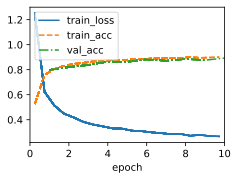

In [ ]:
trainer = d2l.Trainer(max_epochs=10)
model3 = LeNet3(lr=0.1)
model3.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model3, data)

In [ ]:
with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model3, (1, 28, 28), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

LeNet3(
  30.38 k, 100.000% Params, 404.55 KMac, 100.000% MACs, 
  (net): Sequential(
    30.38 k, 100.000% Params, 404.55 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.514% Params, 122.3 KMac, 30.232% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.163% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.163% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 7.953% Params, 241.6 KMac, 59.720% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.395% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.395% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12.83 k, 42.241% Params, 12.83 KMac, 3.172% MACs, 16, 32, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU(0, 0.000% Params, 32.0 Mac, 0.008% MACs, )
    (8): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (9): Linear(3

Problem 2 Model - Adjusted number of full connected layers

In [ ]:
class LeNet4(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(240), nn.ReLU(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(32), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )

In [ ]:
model4 = LeNet4()
model4.layer_summary((1, 1, 28, 28))

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 240])
ReLU output shape: 	 torch.Size([1, 240])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 32])
ReLU output shape: 	 torch.Size([1, 32])
Linear output shape: 	 torch.Size([1, 10])


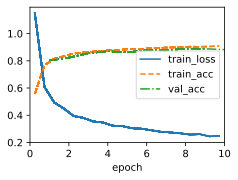

In [ ]:
trainer = d2l.Trainer(max_epochs=10)
model4 = LeNet4(lr=0.1)
model4.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model4, data)

In [ ]:
with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model4, (1, 28, 28), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

LeNet4(
  140.95 k, 100.000% Params, 515.36 KMac, 100.000% MACs, 
  (net): Sequential(
    140.95 k, 100.000% Params, 515.36 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.111% Params, 122.3 KMac, 23.732% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 0.913% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 0.913% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 1.714% Params, 241.6 KMac, 46.880% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.310% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.310% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(96.24 k, 68.281% Params, 96.24 KMac, 18.674% MACs, in_features=400, out_features=240, bias=True)
    (8): ReLU(0, 0.000% Params, 240.0 Mac, 0.047% MACs, )
    (9): L

Problem 2 Model - Adjusted learning rate

In [13]:
class LeNet5(d2l.Classifier):
  def __init__(self, lr=0.001, num_classes=10):
    super().__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(num_classes)
    )

In [14]:
model5 = LeNet5()
model5.layer_summary((1, 1, 28, 28))

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
ReLU output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
ReLU output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
ReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
ReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


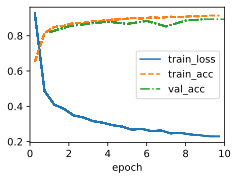

In [20]:
trainer = d2l.Trainer(max_epochs=10)
model5 = LeNet5(lr=0.15)
model5.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model5, data)

In [21]:
with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model5, (1, 28, 28), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

LeNet5(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Mac, 0.028% MACs, )
    (9): Lin